# FACE , people and car detection

## طبقه‌بندهای HAAR Cascade

- همانطور که در بخش قبلی دیدیم، می‌توانیم ویژگی‌هایی را از یک تصویر استخراج کنیم و از آن ویژگی‌ها برای طبقه‌بندی اشیاء استفاده کنیم.

### طبقه‌بندهای HAAR Cascade چیستند؟

یک روش تشخیص شیء است که ویژگی‌های HAAR را به مجموعه‌ای از طبقه‌بندها (cascade) وارد می‌کند تا اشیایی را که برای شناسایی آن‌ها آموزش دیده‌اند، در تصویر شناسایی کند. این طبقه‌بندها معمولاً برای شناسایی یک نوع شیء آموزش داده می‌شوند، اما می‌توانیم چندین مورد از آن‌ها را به صورت موازی استفاده کنیم؛ مثلاً برای شناسایی همزمان چشم‌ها و چهره‌ها.

## HAAR Classifiers Explained

1. طبقه‌بندهای HAAR با استفاده از تعداد زیادی تصویر مثبت (یعنی تصاویری که شیء مورد نظر در آن‌ها وجود دارد) و تصاویر منفی (یعنی تصاویری که شیء مورد نظر در آن‌ها وجود ندارد) آموزش داده می‌شوند.

2. سپس ویژگی‌ها با استفاده از یک پنجره لغزنده از بلوک‌های مستطیلی استخراج می‌شوند. این ویژگی‌ها تک مقداری هستند و با کم کردن مجموع شدت پیکسل‌های زیر مستطیل‌های سفید از مستطیل‌های سیاه محاسبه می‌شوند. با این حال، حتی برای یک پنجره پایه ۲۴ در ۲۴ پیکسل، تعداد محاسبات بسیار زیادی (۱۸۰,۰۰۰ ویژگی تولید می‌شود) لازم است. بنابراین پژوهشگران روشی به نام تصویر انتگرالی (Integral Image) ابداع کردند که این محاسبات را تنها با چهار ارجاع به آرایه انجام می‌دهد.

3. با این حال، هنوز هم ۱۸۰,۰۰۰ ویژگی وجود داشت که بیشتر آن‌ها ارزش واقعی چندانی نداشتند.

4. برای انتخاب مهم‌ترین ویژگی‌ها، از الگوریتم AdaBoost که توسط Freund و Schapire معرفی شده بود، استفاده شد. این الگوریتم به دلیل سادگی پیاده‌سازی، گزینه مناسبی بود. در فرآیند Boosting، با ترکیب چند طبقه‌بند ضعیف و اختصاص وزن بیشتر به نمونه‌هایی که به اشتباه طبقه‌بندی شده‌اند، یک طبقه‌بند قوی ساخته می‌شود. این کار باعث شد تعداد ویژگی‌ها از ۱۸۰,۰۰۰ به حدود ۶,۰۰۰ کاهش یابد که همچنان تعداد قابل توجهی است.

5. به صورت شهودی فکر کنید، اگر از میان این ۶۰۰۰ ویژگی، برخی از آن‌ها اطلاعات بیشتری داشته باشند، چه می‌شود اگر ابتدا از ویژگی‌های با بیشترین اطلاعات برای بررسی اینکه آیا یک ناحیه می‌تواند بالقوه شامل یک چهره باشد یا نه استفاده کنیم (وجود مثبت‌های کاذب مشکل بزرگی نخواهد بود). با این کار، دیگر نیازی به محاسبه همه ۶۰۰۰ ویژگی به طور همزمان نیست.

6. این مفهوم به عنوان «آبشار طبقه‌بندها» (cascade of classifiers) شناخته می‌شود. برای تشخیص چهره، روش ویولا-جونز از ۳۸ مرحله استفاده می‌کند.

**به طور خلاصه:**

طبقه‌بندهای HAAR Cascade یکی از روش‌های قدرتمند و پرکاربرد برای تشخیص اشیاء در تصاویر است. این روش با بهره‌گیری از ویژگی‌های ساده HAAR و الگوریتم تقویتی AdaBoost، ابتدا از میان هزاران ویژگی، مهم‌ترین آن‌ها را انتخاب می‌کند. سپس با استفاده از ساختار آبشاری طبقه‌بندها (Cascade of Classifiers)، فرآیند تشخیص را به صورت مرحله‌ای و بسیار سریع انجام می‌دهد. استفاده از تصویر انتگرالی (Integral Image) نیز باعث می‌شود محاسبات ویژگی‌ها با سرعت بالا انجام شود. در نتیجه، این روش امکان شناسایی دقیق و سریع اشیایی مانند چهره و خودرو را حتی در تصاویر پیچیده فراهم می‌کند.


## Face & Eye Detection using HAAR Cascade Classifiers

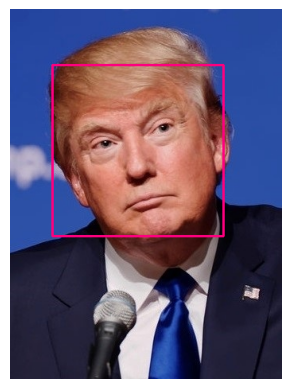

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, faces will be an empty array
if len(faces) == 0:
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    
# now display result with matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

این کد با هدف شناسایی چهره‌ها در یک تصویر، مراحل زیر را به صورت گام‌به‌گام و زیبا انجام می‌دهد:

1. **وارد کردن کتابخانه‌های مورد نیاز:**  
    کتابخانه‌های `matplotlib` برای نمایش تصویر، `numpy` برای پردازش داده‌ها و `opencv` برای تشخیص چهره بارگذاری می‌شوند.

2. **بارگذاری طبقه‌بند چهره:**  
    فایل طبقه‌بند HAAR Cascade مخصوص تشخیص چهره بارگذاری می‌شود تا بتواند چهره‌ها را در تصویر شناسایی کند.

3. **خواندن و پیش‌پردازش تصویر:**  
    تصویر مورد نظر خوانده شده و به سطح خاکستری تبدیل می‌شود تا تشخیص چهره با دقت بیشتری انجام شود.

4. **شناسایی چهره‌ها:**  
    با استفاده از متد `detectMultiScale`، مختصات و ابعاد مستطیل دور هر چهره استخراج می‌شود.

5. **بررسی وجود چهره:**  
    اگر چهره‌ای شناسایی نشود، پیام مناسبی نمایش داده می‌شود.

6. **رسم مستطیل دور چهره‌ها:**  
    برای هر چهره‌ی شناسایی‌شده، یک مستطیل رنگی با ضخامت مناسب روی تصویر رسم می‌شود تا ناحیه چهره به‌وضوح مشخص شود.

7. **نمایش تصویر نهایی:**  
    تصویر خروجی با مستطیل‌های رنگی دور چهره‌ها، به صورت بدون حاشیه و با کیفیت بالا نمایش داده می‌شود.

این فرآیند، نمونه‌ای از کاربرد هوش مصنوعی و بینایی ماشین در پردازش تصاویر است که می‌تواند در پروژه‌های متنوعی مانند امنیت، عکاسی و تعامل انسان و رایانه مورد استفاده قرار گیرد.

### Let's combine face and eye detection

Text(0.5, 1.0, 'Detected Face')

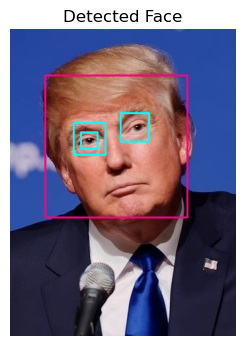

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
 
img = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if len(faces) == 0:
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
    
# Lets show the result by using matplotlib and subplot
plt.subplot(121) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Face')

### Let's make a live face & eye detection, keeping the face inview at all times

In [ ]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return img
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      

### Tuning Cascade Classifiers

*ourClassifier*.**detectMultiScale**(تصویر ورودی، **ضریب مقیاس**، **حداقل همسایه‌ها**)

- **ضریب مقیاس**  
مشخص می‌کند که هر بار تصویر ورودی تا چه اندازه کوچک‌تر شود. به عنوان مثال، در تشخیص چهره معمولاً مقدار 1.3 استفاده می‌شود؛ یعنی هر بار تصویر ۳۰٪ کوچک‌تر می‌شود. مقادیر کوچک‌تر مانند 1.05 زمان پردازش را افزایش می‌دهد اما نرخ تشخیص را بالا می‌برد.

- **حداقل همسایه‌ها**  
تعداد همسایه‌هایی که هر پنجره‌ی احتمالی باید داشته باشد تا به عنوان یک شناسایی مثبت در نظر گرفته شود. معمولاً بین ۳ تا ۶ تنظیم می‌شود.  
این پارامتر مانند تنظیم حساسیت عمل می‌کند؛ مقادیر پایین ممکن است چندین چهره را روی یک چهره شناسایی کند. مقادیر بالا باعث کاهش مثبت‌های کاذب می‌شود اما ممکن است برخی چهره‌ها را از دست بدهید.
